<a href="https://colab.research.google.com/github/mdivk/colab/blob/master/Pandas_on_Stackoverflow_Sampled_Data_from_BigQuery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.6.9


In [2]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [0]:
import pandas as pd

In [0]:
project = "welynx"
sample_ratio = 0.01
real_sample_ratio = 1-sample_ratio
q_bq_full = "SELECT * FROM `bigquery-public-data.stackoverflow.users`"
q_bq_sample = "SELECT * FROM `bigquery-public-data.stackoverflow.users` WHERE RAND() > " + str(real_sample_ratio)

Don't generate a dataframe based on this full size of table with 11376305 rows, always use a sampled dataset

In [9]:
df_full = pd.read_gbq(q_bq_full, project_id=project, dialect='standard')

KeyboardInterrupt: ignored

In [0]:
df_full.count

In [0]:
df_full["reputation"].hist(bins=5)

In [0]:
df_full.describe()

In [0]:
df_sample = pd.read_gbq(q_bq_sample, project_id=project, dialect='standard')

In [30]:
df_sample.count()

id                   113841
display_name         113841
about_me               9723
age                       0
creation_date        113841
last_access_date     113841
location              29235
reputation           113841
up_votes             113841
down_votes           113841
views                113841
profile_image_url     92562
website_url            6745
dtype: int64

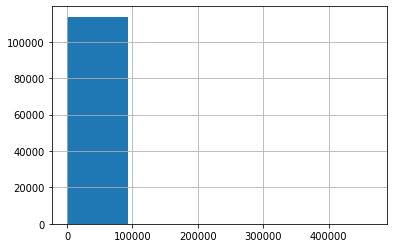

In [31]:
df_sample["reputation"].hist(bins=5)

In [14]:
df_sample.describe()

,id,reputation,up_votes,down_votes,views
count,1.139390e+05,113939.000000,113939.000000,113939.000000,113939.000000
mean,6.538373e+06,118.937625,11.277640,1.316590,13.759687
std,3.490029e+06,1527.795211,121.977222,65.073154,186.040944
min,4.000000e+01,1.000000,0.000000,0.000000,0.000000
25%,3.544937e+06,1.000000,0.000000,0.000000,0.000000
50%,6.586600e+06,1.000000,0.000000,0.000000,0.000000
75%,9.577146e+06,11.000000,0.000000,0.000000,3.000000
max,1.246274e+07,146568.000000,10709.000000,12035.000000,23296.000000


In [0]:
df_sample['reputation'] = pd.qcut(df_sample['reputation'], q=1)

In [22]:
df_sample.head(3)

,id,display_name,about_me,age,creation_date,last_access_date,location,reputation,up_votes,down_votes,views,profile_image_url,website_url
0,2605,Diones,Just a wannabe programmer.,None,2008-08-23 14:25:40.717000+00:00,2010-12-08 10:56:05.170000+00:00,"Fargo, ND","(0.999, 146568.0]",95,3,306,None,http://logdiones.blogspot.com
1,31785,Johan Berg Nilsson,None,None,2008-10-27 13:02:14.893000+00:00,2019-11-29 20:11:22.057000+00:00,"Stockholm, Stockholm Sweden","(0.999, 146568.0]",16,0,767,None,http://www.markupartist.com
2,50886,senorcarbone,<p>Distributed Systems Research Engineer.\nApa...,None,2009-01-02 12:59:53.770000+00:00,2017-04-10 20:37:52.580000+00:00,"Stockholm, Sweden","(0.999, 146568.0]",9,0,79,None,None


In [26]:
df_sample["reputation"].head(3)

0    (0.999, 146568.0]
1    (0.999, 146568.0]
2    (0.999, 146568.0]
Name: reputation, dtype: category
Categories (1, interval[float64]): [(0.999, 146568.0]]

In [28]:
df_sample["reputation"][1]

Interval(0.999, 146568.0, closed='right')